In [ ]:
! pip install scipy # A library for scientific computing (e.g., numerical operations).
! pip install imblearn # A library for dealing with imbalanced datasets 
! pip install xgboost #  powerful gradient boosting library often used for classification and regression.


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing required Lib..


In [1]:
# imported required libraries
import pandas as pd # for data manipulation
import numpy as np # for numerical operations...
import matplotlib.pyplot as plt # for general plotting purpose
import seaborn as sns # for enhanced visualization
import scipy as  sc # for scientific computing

Loading Dataset and making Dataframe


In [2]:
# loading csv and making dataframe
data = pd.read_csv("C:/Users/ancha/Downloads/Hsptl_radmssn_prjct_main_data/diabetic_data.csv")
# print(data.head())
df = pd.DataFrame(data)
print("DataFrame shape:", df.shape)
print("First 5 rows:")
print(df.head())
print(df.info())
# checking for unique values in final column (target variable)
print("Unique values of 'readmitted':", df['readmitted'].unique())


DataFrame shape: (101766, 50)
First 5 rows:
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  

Preprocessing of the data
(cleaning)


In [3]:
# 6: Data Cleaning - Dropping Columns and Handling Missing Values
columns_to_drop = [
    "payer_code", "encounter_id", "weight", "age", "patient_nbr",
    "medical_specialty", "examide", "citoglipton", "chlorpropamide",
    "glimepiride", "acetohexamide", "tolbutamide", "acarbose", "miglitol",
    "troglitazone", "glipizide-metformin"
]

# Drop columns with explanations
df = df.drop(columns=columns_to_drop, axis=1, errors='ignore')
# "payer_code", "medical_specialty", "weight" have high missing %, "encounter_id", "patient_nbr" are unique identifiers,
# "age" is dropped (already encoded), "examide" to "glipizide-metformin" have only one value

# Handle missing values
df.replace('?', np.nan, inplace=True)

# Calculate missing value percentages
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nMissing value percentages before imputation/deletion:\n", missing_percentages[missing_percentages > 0])

# Impute 'race' with mode (most frequent value)
df['race'].fillna(df['race'].mode()[0], inplace=True)

# Impute 'max_glu_serum' with mode
df['max_glu_serum'].fillna(df['max_glu_serum'].mode()[0], inplace=True)

# Impute 'A1Cresult' with mode
df['A1Cresult'].fillna(df['A1Cresult'].mode()[0], inplace=True)

# Drop rows where 'diag_1', 'diag_2', 'diag_3' are missing (critical diagnostic info)
df.dropna(subset=['diag_1', 'diag_2', 'diag_3'], inplace=True)

# Drop remaining rows with any NaN (if any)
df.dropna(inplace=True)

print("\nMissing value percentages after imputation/deletion:\n", (df.isnull().sum() / len(df)) * 100) # Should all be 0

print("\nFirst 5 rows after cleaning:")
print(df.head())
print("\nShape after cleaning:", df.shape)


Missing value percentages before imputation/deletion:
 race              2.233555
diag_1            0.020636
diag_2            0.351787
diag_3            1.398306
max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64


C:\Users\ancha\AppData\Local\Temp\ipykernel_18228\1834684475.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)
C:\Users\ancha\AppData\Local\Temp\ipykernel_18228\1834684475.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.




Missing value percentages after imputation/deletion:
 race                        0.0
gender                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
glipizide                   0.0
glyburide                   0.0
pioglitazone                0.0
rosiglitazone               0.0
tolazamide                  0.0
insulin                     0.0
glyburide-metformin         0.0
glimepiride-pioglitazone    0.0
metformin-rosigli

In [4]:
# 2. standardization for smooth processing

df['gender'] = df["gender"].replace({'Female': 'F', "Male": 'M'})
df['race'] = df['race'].replace({'AfricanAmerican': 'AfAm', 'Caucasian': 'Caus', 'Hispanic': 'Hsp', 'Other':'Otr'})

# 3. removing other vals than M, F in gender column
df = df[df['gender'].isin(['M', 'F'])]

# modifying col named Max-glucose-serum
df['max_glu_serum'] = df['max_glu_serum'].replace({"none": '0', 'normal': '1', '>200': "2", ">300": '3'})

# since we are using binary models we will change the col 'readmitted'.
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})
df['diabetesMed'] = df['diabetesMed'].replace({'No':0, 'Yes': 1})

# 4. Check Unique Values Before Filtering
print(df['gender'].unique())
print(df['readmitted'].unique())
print(df['readmitted'].value_counts())

# print(df.columns)
print(df.head())

['F' 'M']
[0 1]
readmitted
0    88991
1    11250
Name: count, dtype: int64
   race gender  admission_type_id  discharge_disposition_id  \
1  Caus      F                  1                         1   
2  AfAm      F                  1                         1   
3  Caus      M                  1                         1   
4  Caus      M                  1                         1   
5  Caus      M                  2                         1   

   admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  \
1                    7                 3                  59               0   
2                    7                 2                  11               5   
3                    7                 2                  44               1   
4                    7                 1                  51               0   
5                    2                 3                  31               6   

   num_medications  number_outpatient  ...  rosiglitazone  tolaza

C:\Users\ancha\AppData\Local\Temp\ipykernel_18228\3052293494.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})
C:\Users\ancha\AppData\Local\Temp\ipykernel_18228\3052293494.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetesMed'] = df['diabetesMed'].replace({'No':0, 'Yes': 1})


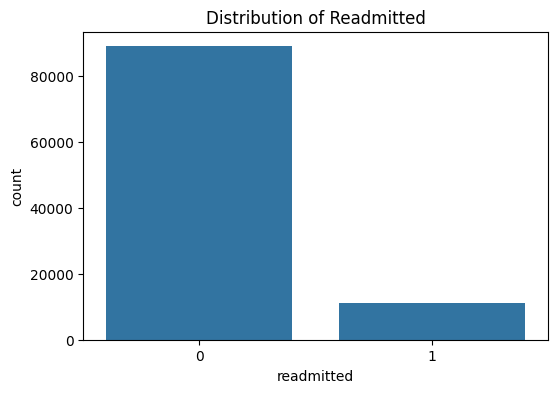

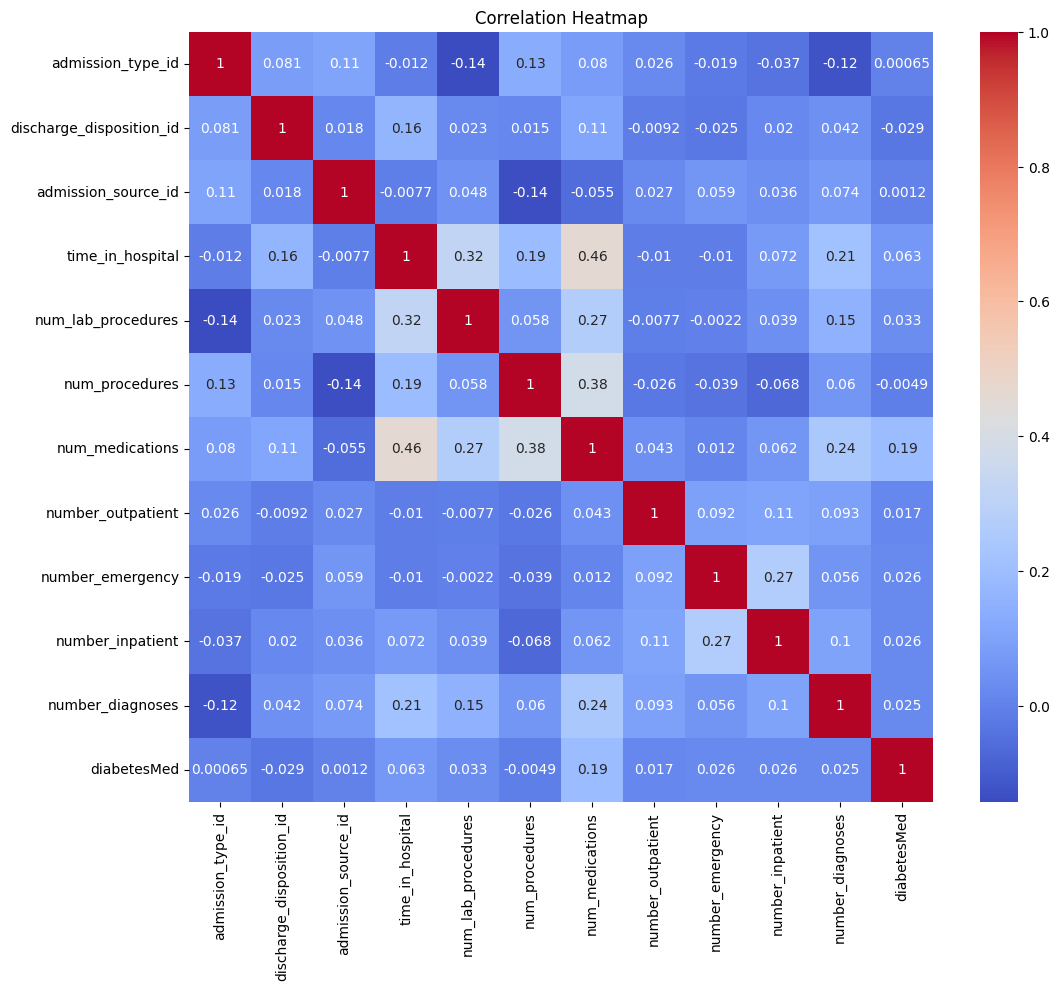

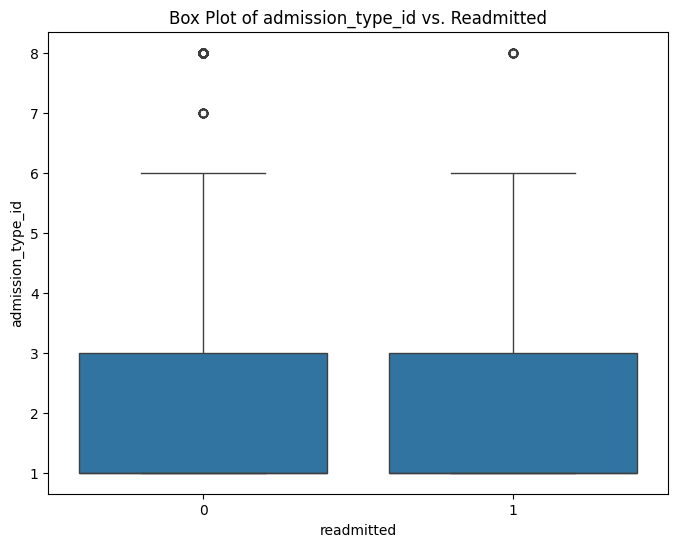

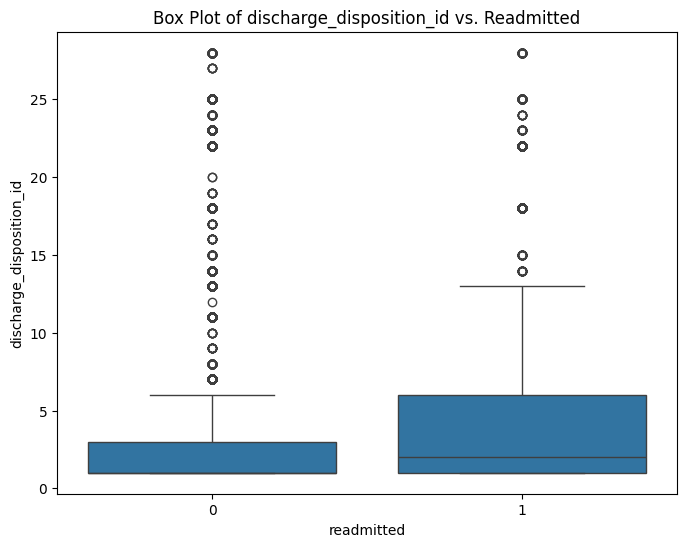

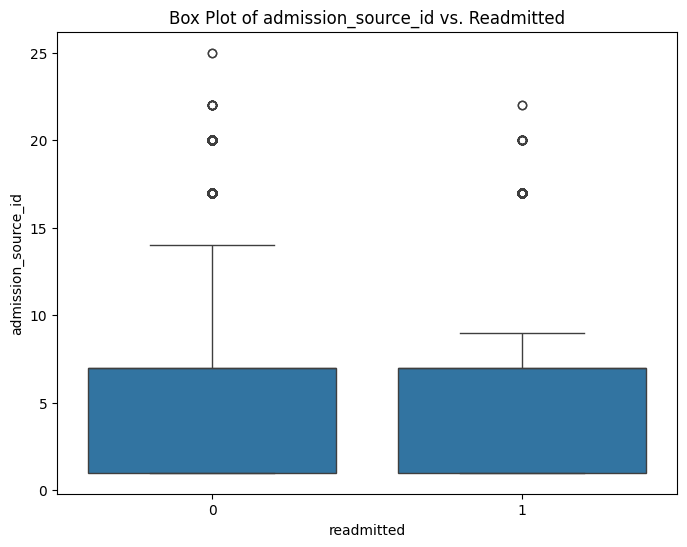

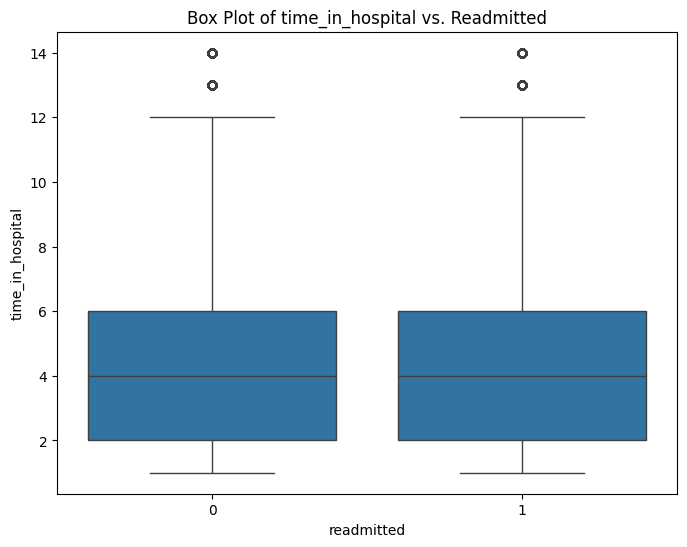

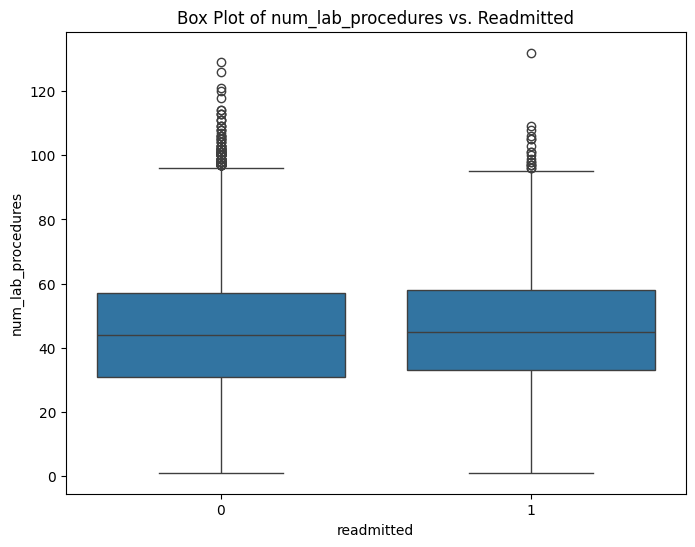

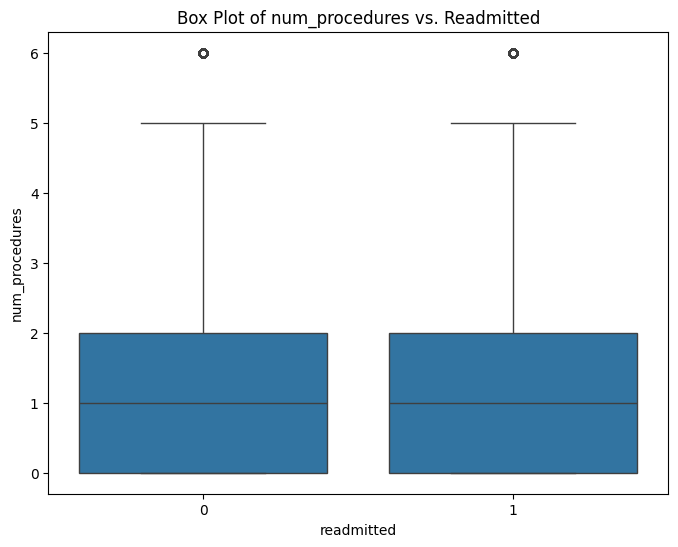

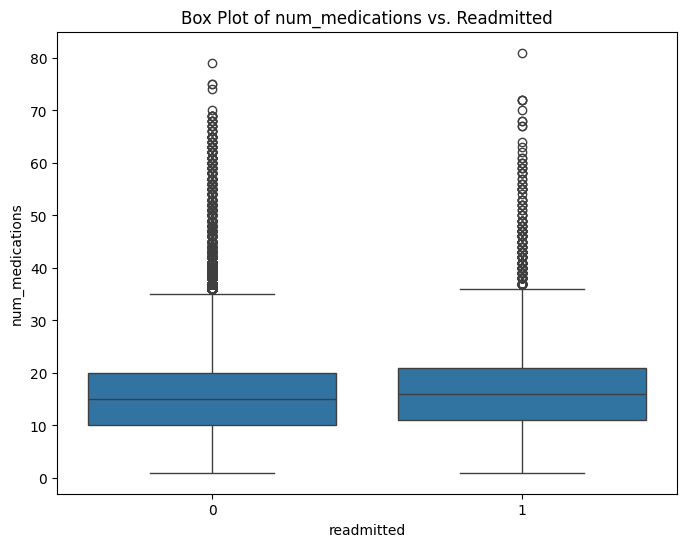

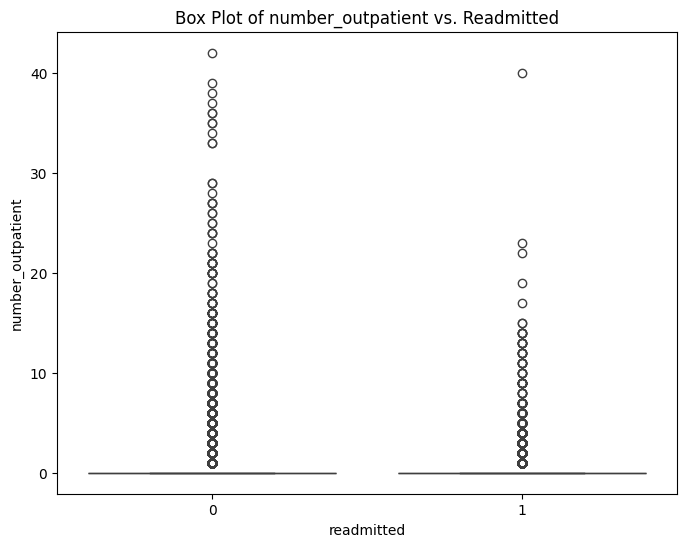

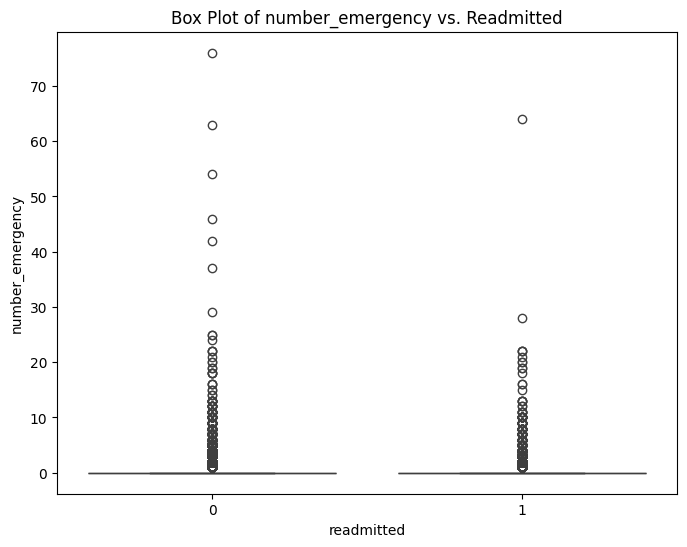

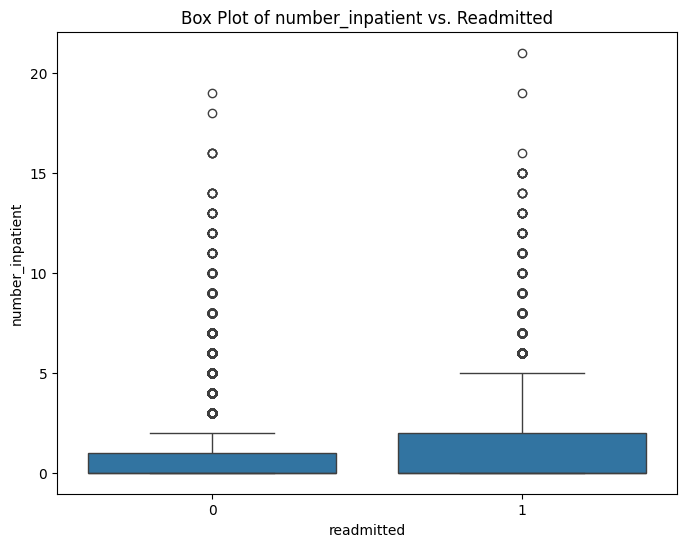

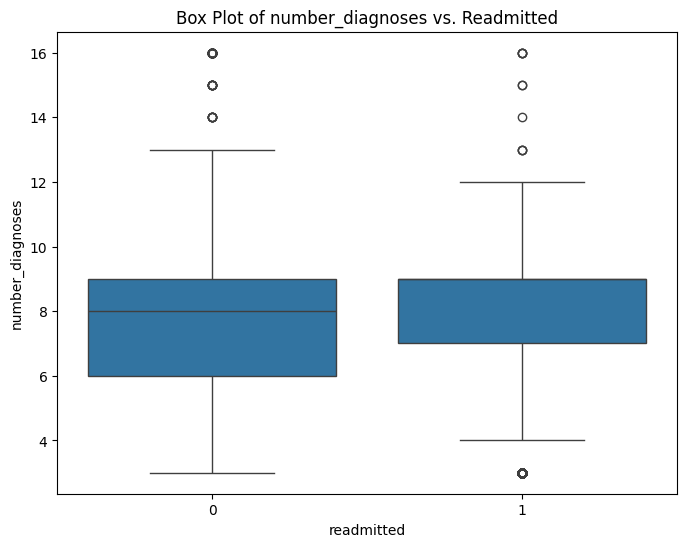

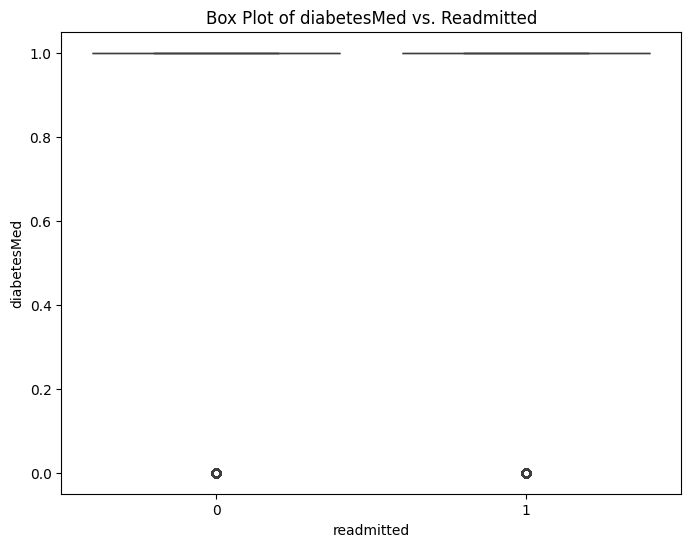

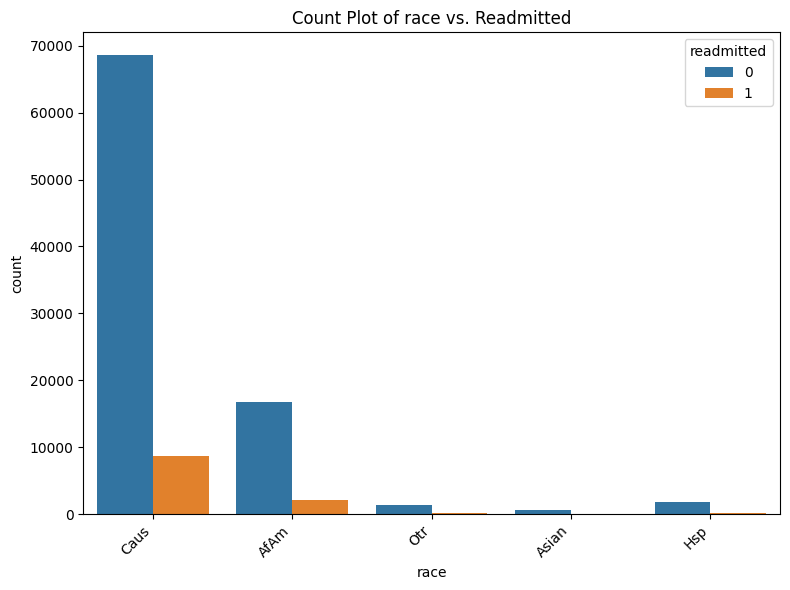

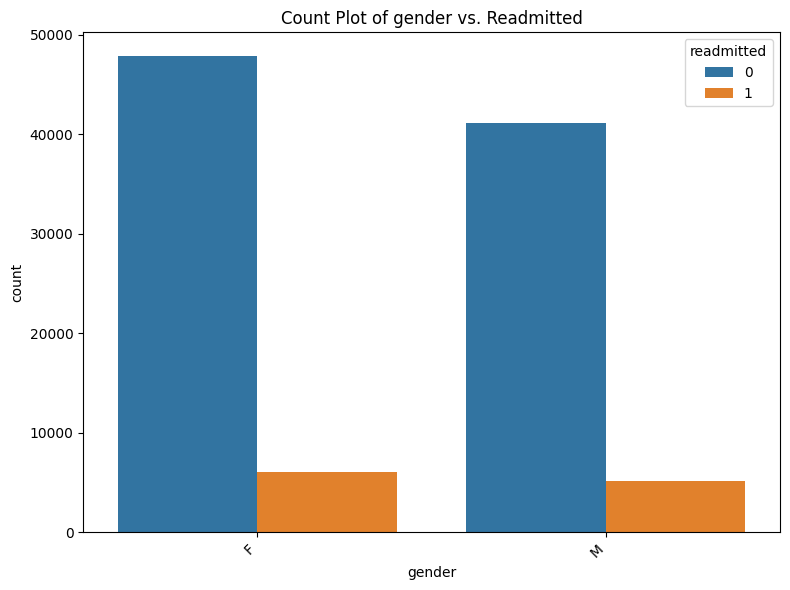

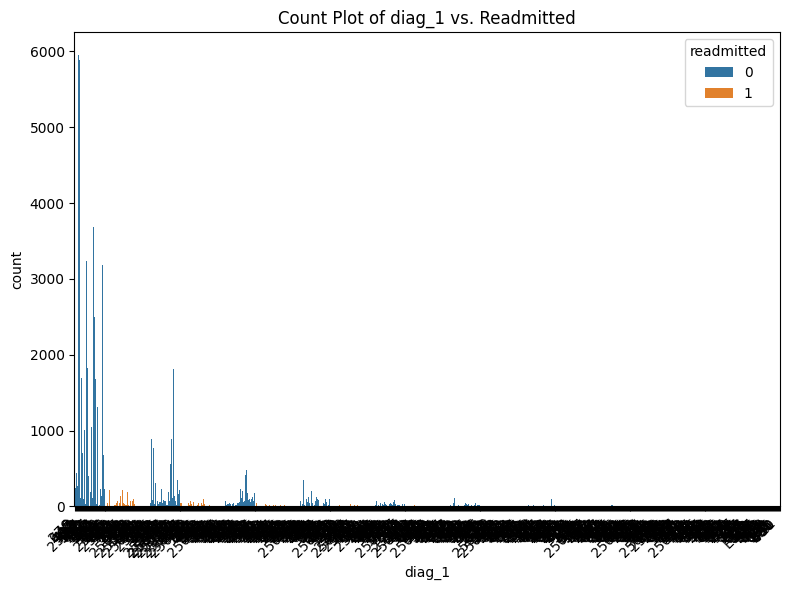

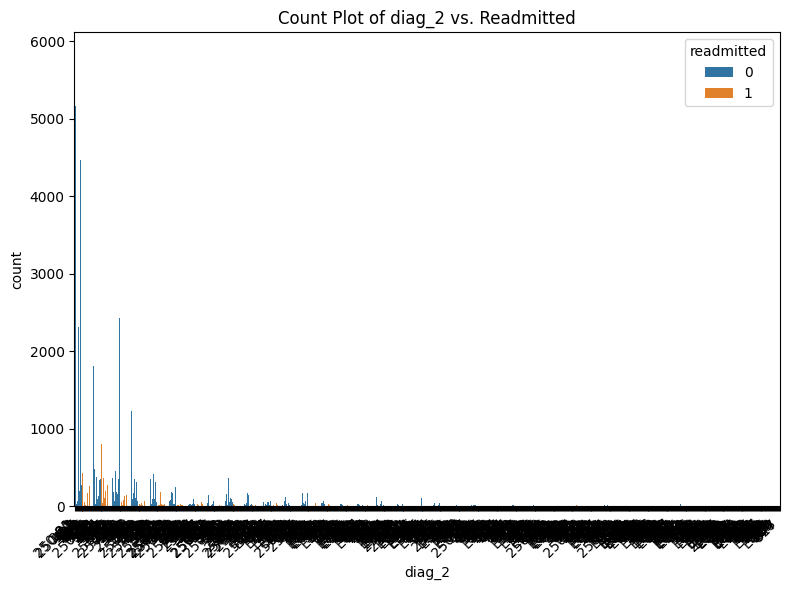

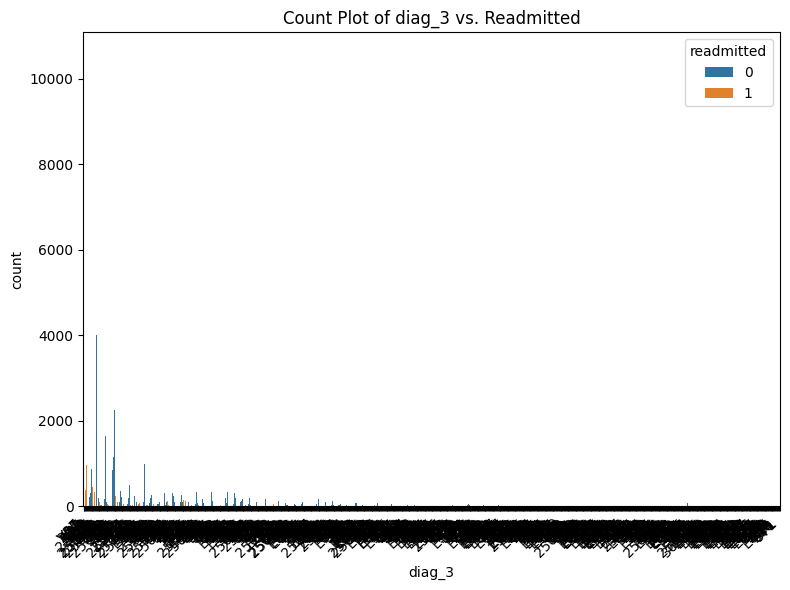

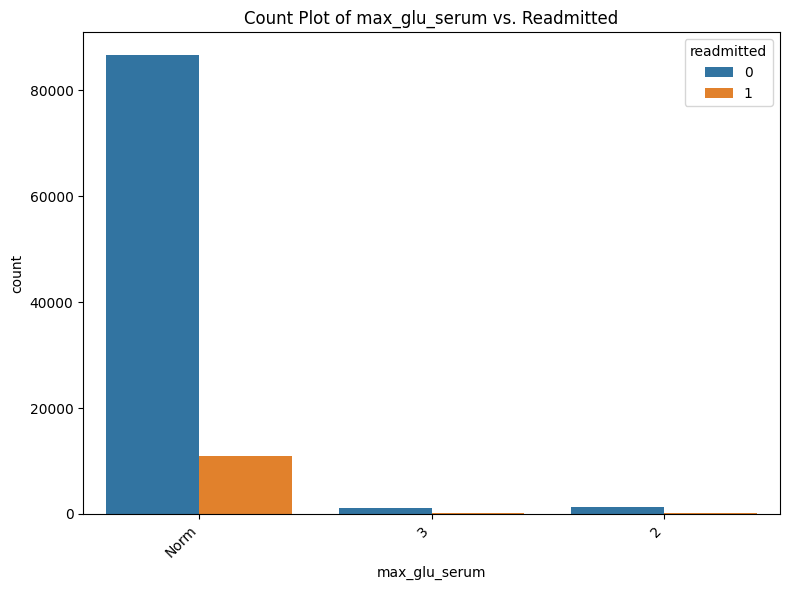

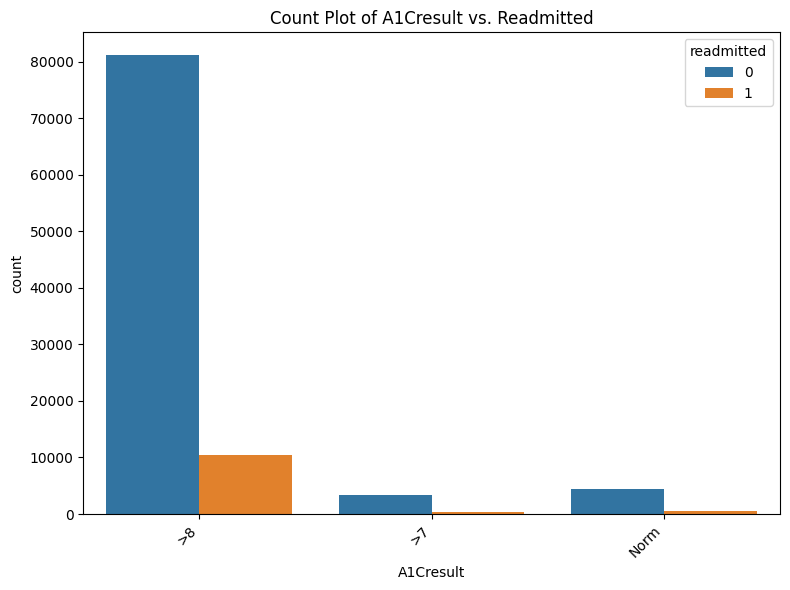

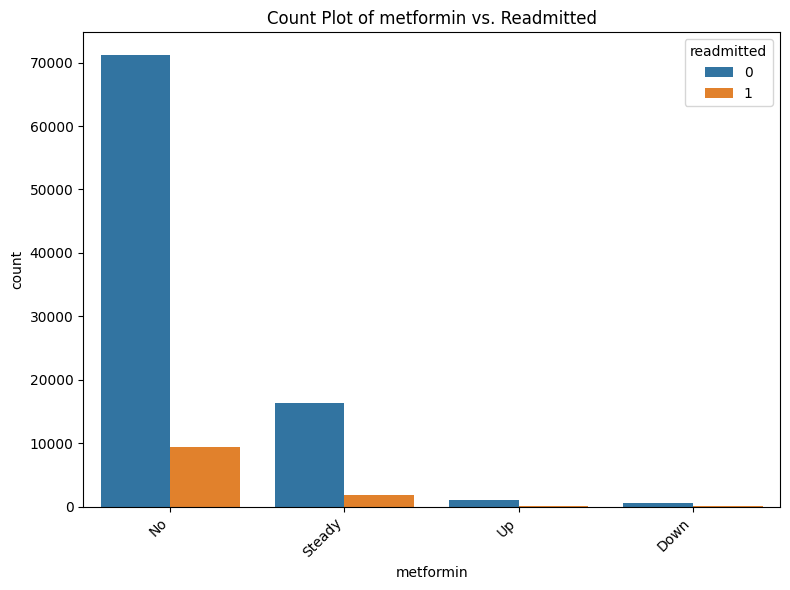

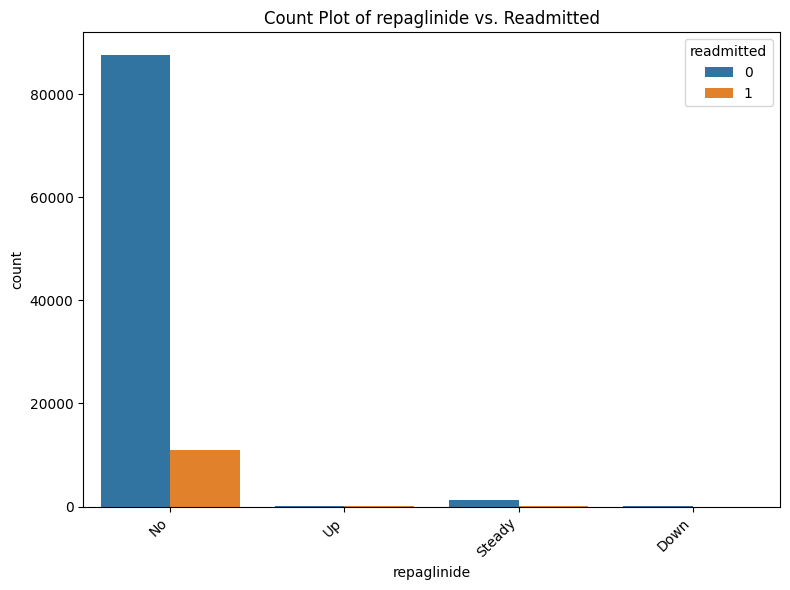

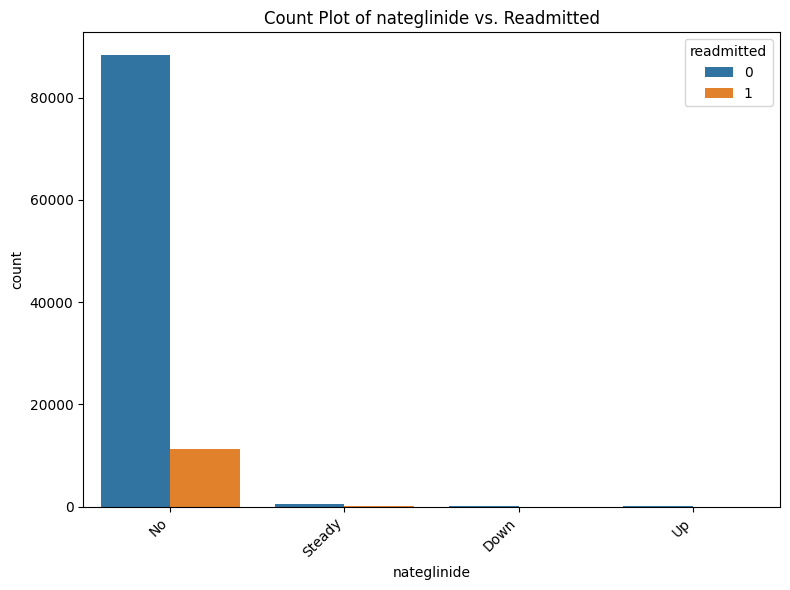

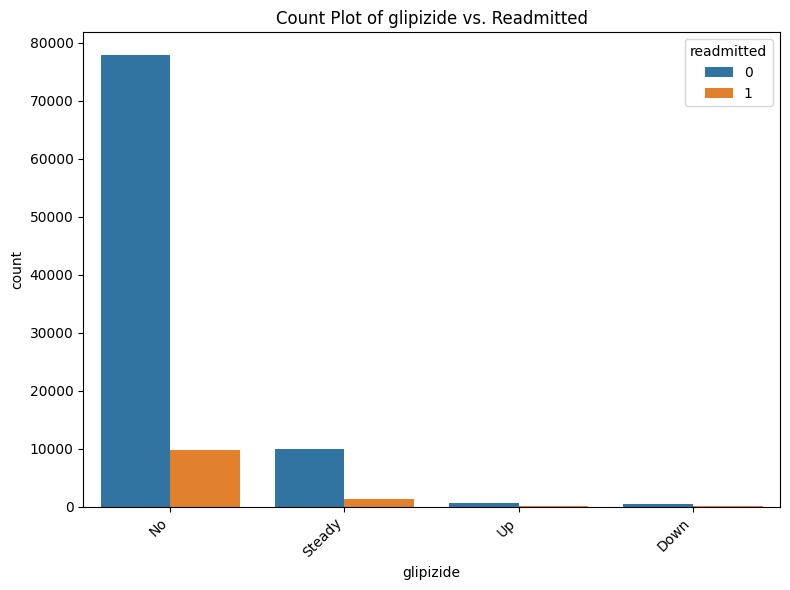

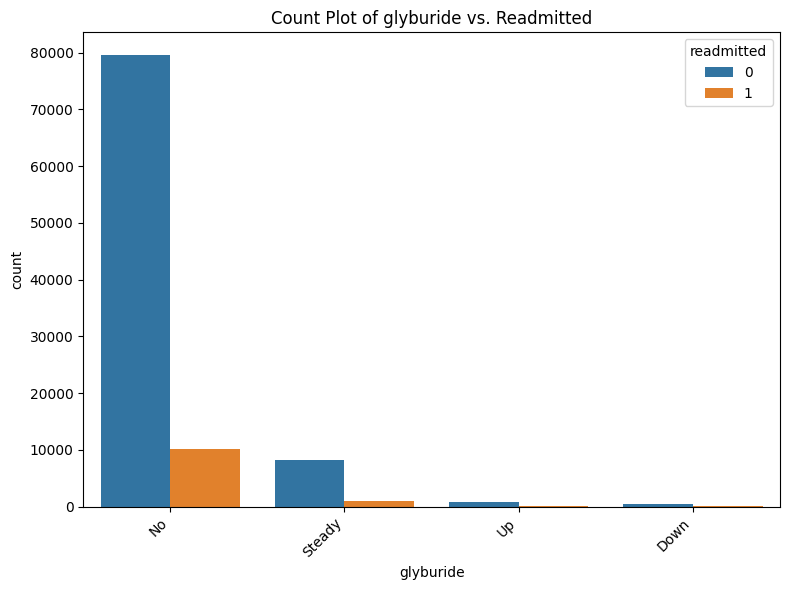

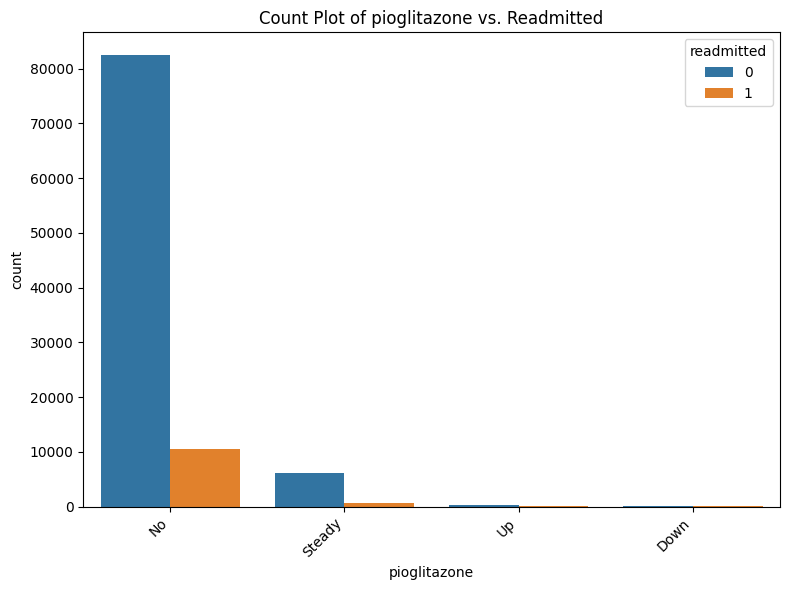

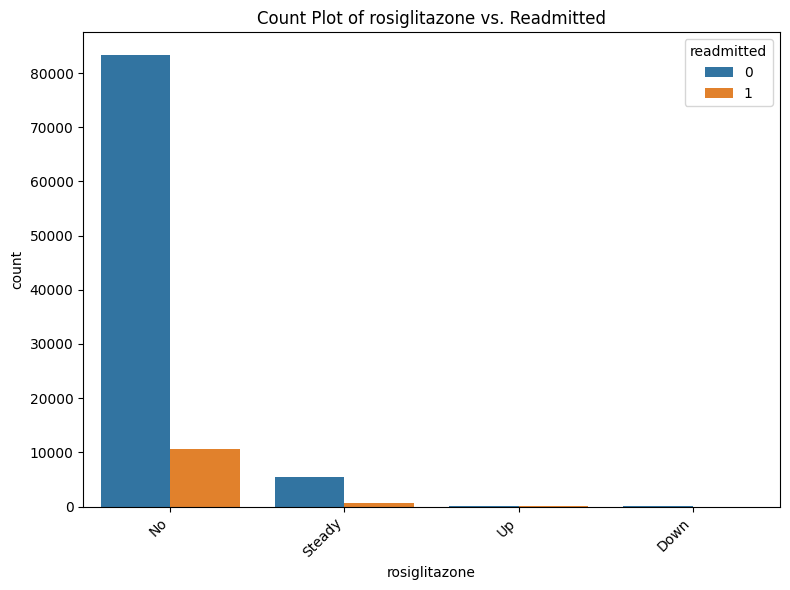

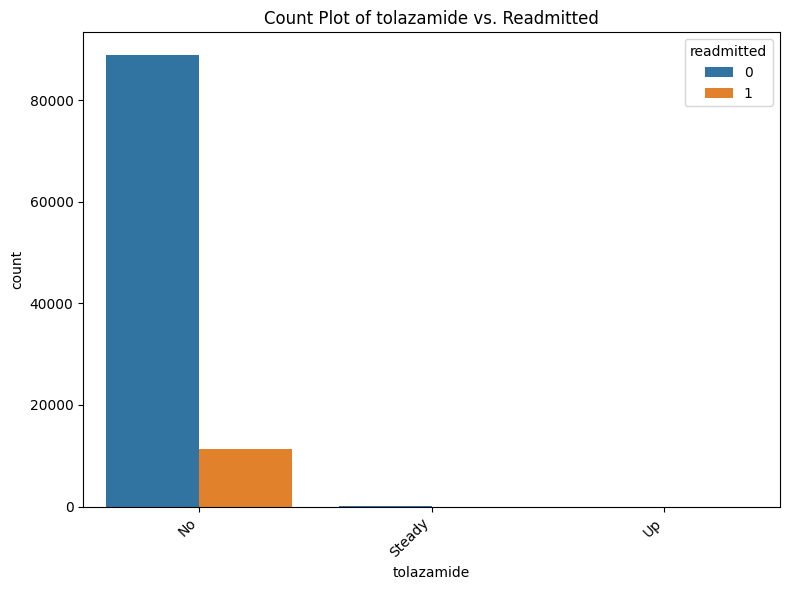

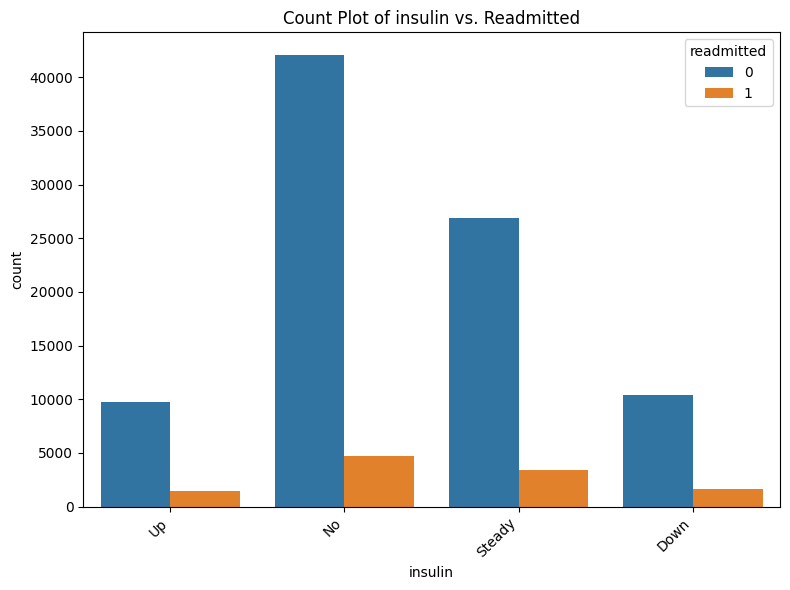

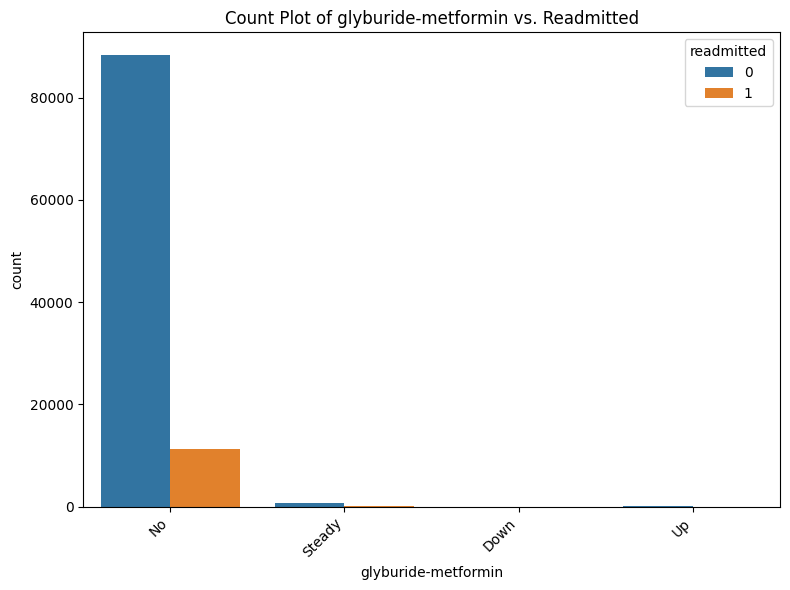

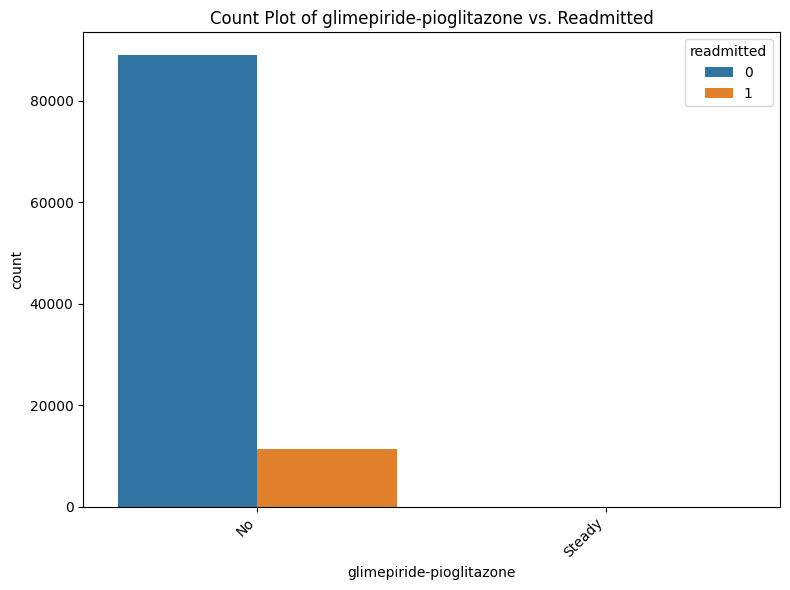

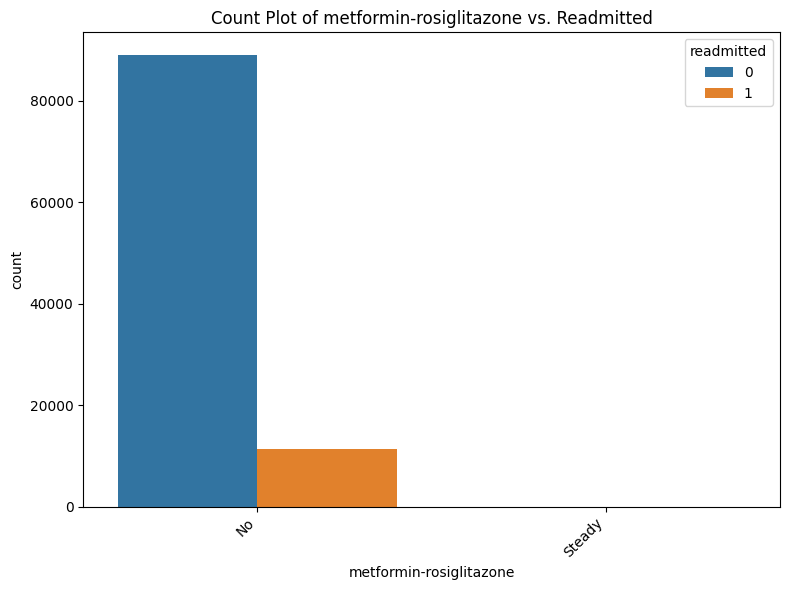

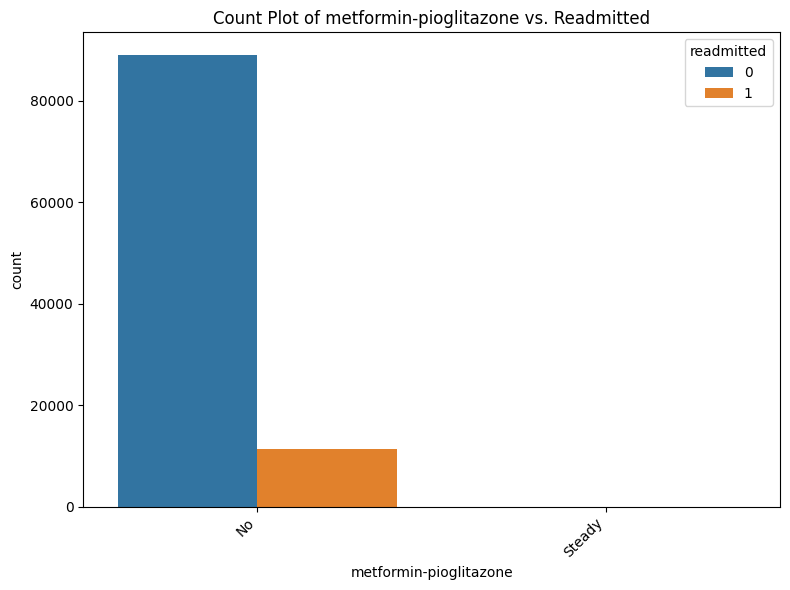

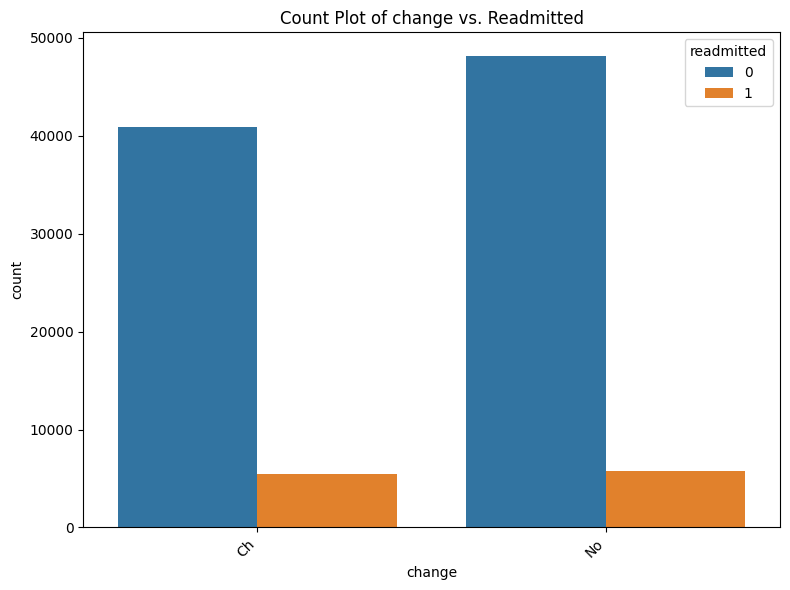

In [5]:
# Exploratory Data Analysis (EDA) - New Cell
# Visualize class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=df)
plt.title('Distribution of Readmitted')
plt.show()

# Correlation heatmap (numerical features)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('readmitted')  # Remove target variable from correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box plots for numerical features vs. target
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='readmitted', y=col, data=df)
    plt.title(f'Box Plot of {col} vs. Readmitted')
    plt.show()

# Bar plots for categorical features vs. target (example)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='readmitted', data=df)
    plt.title(f'Count Plot of {col} vs. Readmitted')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [6]:
# # Integrating all the categorical (cols with string vals) original categorical + drug-related columns
# categorical_cols = [
#     'race', 'max_glu_serum', 'A1Cresult', 'change',
#     'admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',    'acetohexamide', 'glipizide', 
#              'glyburide', 'tolbutamide', 'pioglitazone',    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
#              'tolazamide',    'insulin', 'glyburide-metformin', 'glipizide-metformin',    'glimepiride-pioglitazone', 
#              'metformin-rosiglitazone',    'metformin-pioglitazone']

# # Combine both
# all_categorical_cols = categorical_cols + drug_cols

# Cell 9: One-Hot Encoding
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Get categorical columns dynamically

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nShape after encoding:", df_encoded.shape)
print("\nFirst 5 rows after encoding:")
print(df_encoded.head())

# Keep only columns that exist in the dataframe
# existing_cols = [col for col in all_categorical_cols if col in df.columns]

# One-Hot Encoding
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print(df_encoded.head())

import numpy as np

# Replace '?' with NaN
df_encoded.replace('?', np.nan, inplace=True)

# Option A: Drop rows with missing values
df_encoded.dropna(inplace=True)


Shape after encoding: (100241, 2299)

First 5 rows after encoding:
   admission_type_id  discharge_disposition_id  admission_source_id  \
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   
5                 3                  31               6               16   

   number_outpatient  number_emergency  number_i

In [7]:
# making data-set for seperate for train and test
X = df_encoded.drop('readmitted', axis=1)  # or your target column
y = df_encoded['readmitted']

In [8]:

# splitting the data set

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded.drop('readmitted', axis=1))
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# print(X_train.select_dtypes(include='object').columns)

non_numeric_cols = X_train.select_dtypes(include='object').columns

# print("Non-numeric columns before scaling:", non_numeric_cols.tolist())

# print(X_train[non_numeric_cols].nunique())

for col in non_numeric_cols:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df_encoded['readmitted'], test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)


KeyboardInterrupt: 

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[73  0]
 [14  0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        73
           1       0.00      0.00      0.00        14

    accuracy                           0.84        87
   macro avg       0.42      0.50      0.46        87
weighted avg       0.70      0.84      0.77        87



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print(Counter(y_train_res))


Counter({1: 181, 0: 181})


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


In [17]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# 1. Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Train the model
xgb_model.fit(X_train_scaled, y_train_res)

# 3. Predict on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 4. Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        73
           1       0.00      0.00      0.00        14

    accuracy                           0.84        87
   macro avg       0.42      0.50      0.46        87
weighted avg       0.70      0.84      0.77        87

Confusion Matrix:
 [[73  0]
 [14  0]]


c:\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:51:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0